In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, PowerTransformer,FunctionTransformer,QuantileTransformer
from sklearn.metrics import r2_score,mean_absolute_error

import os

notebook_path = os.getcwd()

In [2]:
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/auto-train-preprocessed.csv"
csv_test_path = f"{notebook_path}/data/auto-test-preprocessed.csv"

In [3]:
df=pd.read_csv(csv_train_path)
train_set=np.array(df)
# df

x_train=train_set[:,:-1]
y_train=train_set[:,-1:]
x_train.shape,y_train.shape

((352, 1), (352, 1))

In [4]:
df=pd.read_csv(csv_test_path)
test_set=np.array(df)
# df

x_test=test_set[:,:-1]
y_test=test_set[:,-1:]
x_test.shape,y_test.shape

((40, 1), (40, 1))

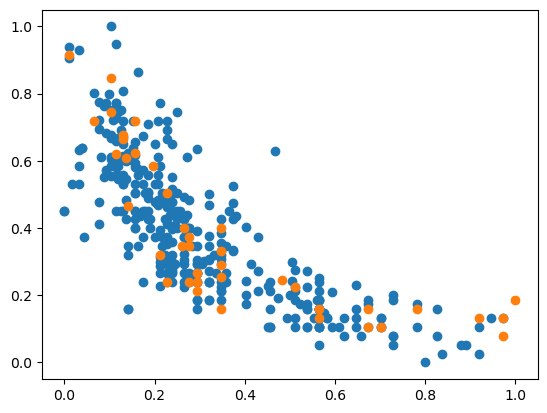

In [5]:
# Visualize
i=0
plt.scatter(x_train[:,i],y_train)
plt.scatter(x_test[:,i],y_test)

In [6]:
model = make_pipeline(
    # SplineTransformer(n_knots=4,degree=2),# Test1
    
    # PowerTransformer(method="yeo-johnson"),  # Test2 'yeo-johnson' "box-cox"
    
    # FunctionTransformer(np.exp),# Test3 np.exp
    # FunctionTransformer(lambda x: np.exp(-x)),# Test3 np.exp
    # FunctionTransformer(lambda x: np.exp(-3*x)),# Test3 np.exp
    # FunctionTransformer(lambda x: 1/(x+0.5)**2.3),# Test3 np.exp
    
    # QuantileTransformer(), # Test4
    # QuantileTransformer(output_distribution="normal"), # Test4
    QuantileTransformer(n_quantiles=4,output_distribution="normal"), # Test4
    LinearRegression(),
)
# in box-cox mode we need x>0
# add epsilon or remove
# print(x_train.min(),y_train.min())
# x_train=x_train+.00001
# x_test = x_test + 0.00001

model.fit(x_train, y_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=4,
                                     output_distribution='normal')),
                ('linearregression', LinearRegression())])

In [7]:
# model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.5115168607634499, 0.1766681084824202)

In [8]:
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)
mean_absolute_error(y_train, y_hat_train),mean_absolute_error(y_test, y_hat_test)

(0.1053215793845408, 0.14005032189348973)

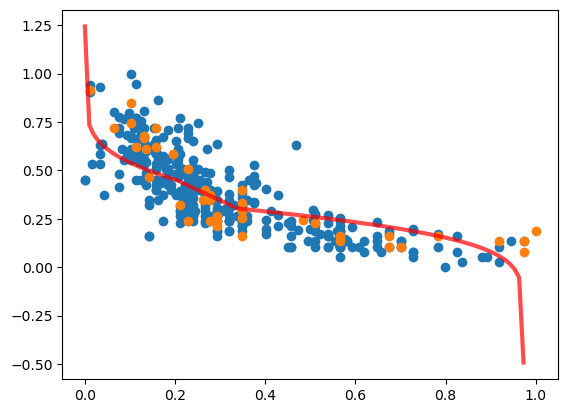

In [9]:
x_plot=np.linspace(x_train.min(),x_train.max(),100)[:,None]
y_hat_plot=model.predict(x_plot)
# print(x_plot.shape,y_hat_plot.shape)

plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x_plot,y_hat_plot,"r",linewidth=3,alpha=0.7)

In [10]:
model

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=4,
                                     output_distribution='normal')),
                ('linearregression', LinearRegression())])

In [11]:
# spl=model.named_steps['splinetransformer']
# spl.bsplines_[0].t , spl.knots

# spl=SplineTransformer()
# spl.fit(x_train,y_train)
# spl.knots

### DEMO FROM [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

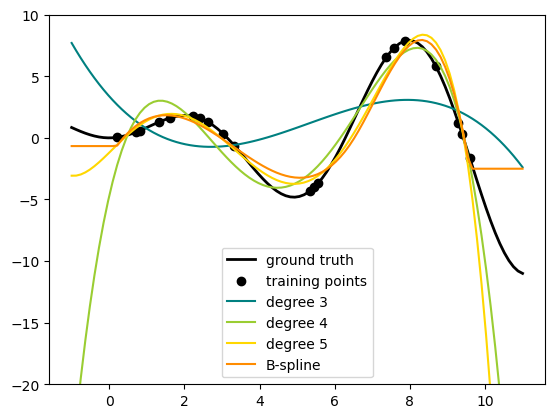

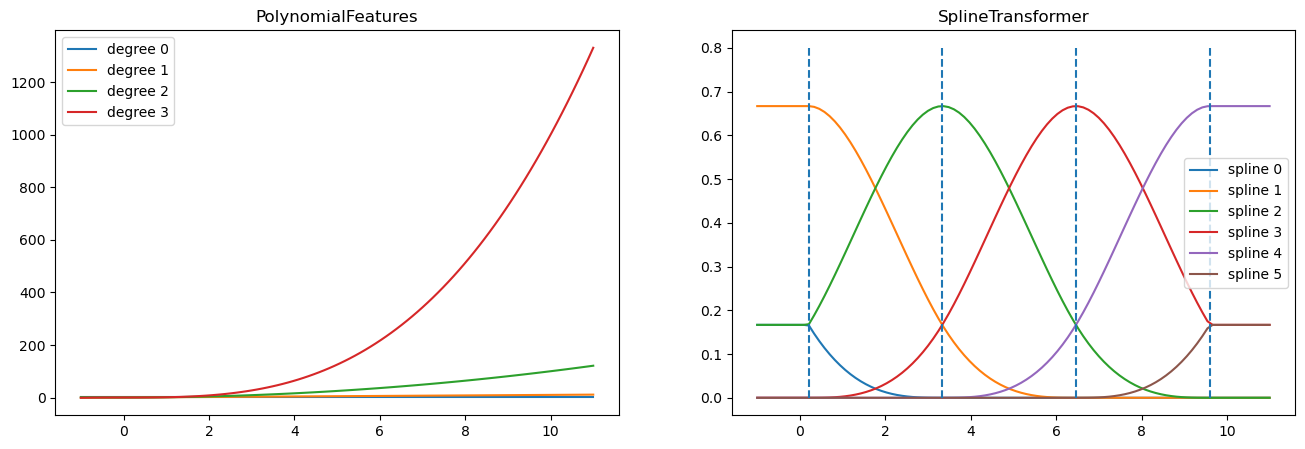

In [12]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)


# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)



x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]


# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

# B-spline with 4 + 3 - 1 = 6 basis functions
model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)
ax.plot(x_plot, y_plot, label="B-spline")
ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()


fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
pft = PolynomialFeatures(degree=3).fit(X_train)
axes[0].plot(x_plot, pft.transform(X_plot))
axes[0].legend(axes[0].lines, [f"degree {n}" for n in range(4)])
axes[0].set_title("PolynomialFeatures")

splt = SplineTransformer(n_knots=4, degree=3).fit(X_train)
axes[1].plot(x_plot, splt.transform(X_plot))
axes[1].legend(axes[1].lines, [f"spline {n}" for n in range(6)])
axes[1].set_title("SplineTransformer")

# plot knots of spline
knots = splt.bsplines_[0].t
axes[1].vlines(knots[3:-3], ymin=0, ymax=0.8, linestyles="dashed")
plt.show()

# axes[1].vlines(knots, ymin=0, ymax=0.8, linestyles="dashed")
# plt.show()


In [13]:
# # Authors: The scikit-learn developers
# # SPDX-License-Identifier: BSD-3-Clause

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# N_SAMPLES = 1000
# FONT_SIZE = 6
# BINS = 30


# rng = np.random.RandomState(304)
# bc = PowerTransformer(method="box-cox")
# yj = PowerTransformer(method="yeo-johnson")
# # n_quantiles is set to the training set size rather than the default value
# # to avoid a warning being raised by this example
# qt = QuantileTransformer(
#     n_quantiles=500, output_distribution="normal", random_state=rng
# )
# size = (N_SAMPLES, 1)


# # lognormal distribution
# X_lognormal = rng.lognormal(size=size)

# # chi-squared distribution
# df = 3
# X_chisq = rng.chisquare(df=df, size=size)

# # weibull distribution
# a = 50
# X_weibull = rng.weibull(a=a, size=size)

# # gaussian distribution
# loc = 100
# X_gaussian = rng.normal(loc=loc, size=size)

# # uniform distribution
# X_uniform = rng.uniform(low=0, high=1, size=size)

# # bimodal distribution
# loc_a, loc_b = 100, 105
# X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
# X_bimodal = np.concatenate([X_a, X_b], axis=0)


# # create plots
# distributions = [
#     ("Lognormal", X_lognormal),
#     ("Chi-squared", X_chisq),
#     ("Weibull", X_weibull),
#     ("Gaussian", X_gaussian),
#     ("Uniform", X_uniform),
#     ("Bimodal", X_bimodal),
# ]

# colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

# fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
# axes = axes.flatten()
# axes_idxs = [
#     (0, 3, 6, 9),
#     (1, 4, 7, 10),
#     (2, 5, 8, 11),
#     (12, 15, 18, 21),
#     (13, 16, 19, 22),
#     (14, 17, 20, 23),
# ]
# axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


# for distribution, color, axes in zip(distributions, colors, axes_list):
#     name, X = distribution
#     X_train, X_test = train_test_split(X, test_size=0.5)

#     # perform power transforms and quantile transform
#     X_trans_bc = bc.fit(X_train).transform(X_test)
#     lmbda_bc = round(bc.lambdas_[0], 2)
#     X_trans_yj = yj.fit(X_train).transform(X_test)
#     lmbda_yj = round(yj.lambdas_[0], 2)
#     X_trans_qt = qt.fit(X_train).transform(X_test)

#     ax_original, ax_bc, ax_yj, ax_qt = axes

#     ax_original.hist(X_train, color=color, bins=BINS)
#     ax_original.set_title(name, fontsize=FONT_SIZE)
#     ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

#     for ax, X_trans, meth_name, lmbda in zip(
#         (ax_bc, ax_yj, ax_qt),
#         (X_trans_bc, X_trans_yj, X_trans_qt),
#         ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
#         (lmbda_bc, lmbda_yj, None),
#     ):
#         ax.hist(X_trans, color=color, bins=BINS)
#         title = "After {}".format(meth_name)
#         if lmbda is not None:
#             title += "\n$\\lambda$ = {}".format(lmbda)
#         ax.set_title(title, fontsize=FONT_SIZE)
#         ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
#         ax.set_xlim([-3.5, 3.5])


# plt.tight_layout()
# plt.show()